In [1]:
import pandas as pd

In [4]:
data_dir = '/Users/kaushikrajnadar/Downloads/AttentionMOI-master/AttentionMOI/example'

label_df = pd.read_csv(f'{data_dir}/label.csv', )
label_df.columns.values[0] = 'subject'

cnv_df = pd.read_csv(f'{data_dir}/cnv.csv.gz')
cnv_df.columns.values[0] = 'subject'

exp_df = pd.read_csv(f'{data_dir}/rna.csv.gz')
exp_df.columns.values[0] = 'subject'

met_df = pd.read_csv(f'{data_dir}/met.csv.gz')
met_df.columns.values[0] = 'subject'


In [5]:
dfs = [label_df, cnv_df, exp_df, met_df]
suffixes = ['', '_cnv', '_exp', '_met']

for i, df in enumerate(dfs):
    df.columns = [col if col == 'subject' else col + suffixes[i] for col in df.columns]

merged = dfs[0]
for df in dfs[1:]:
    merged = merged.merge(df, on='subject')

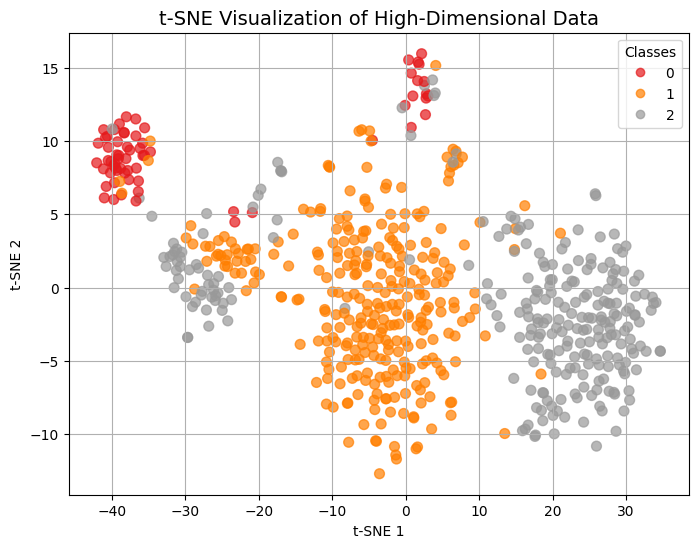

In [14]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example: replace with your actual DataFrame
# df = pd.read_csv('your_data.csv')

# --- Step 1: Separate features and labels (if you have them) ---
# Suppose 'label' is your target column; adjust accordingly
X = merged.drop(columns=['label', 'subject'], errors='ignore').fillna(0)
y = merged['label'] if 'label' in merged.columns else None

# --- Step 2: Standardize the features ---
X_scaled = StandardScaler().fit_transform(X)

# --- Step 3: Apply t-SNE ---
tsne = TSNE(
    n_components=2,       # 2D visualization
    perplexity=30,        # adjust based on sample size
    max_iter=1000,          # number of iterations
    learning_rate='auto',
    init='pca',
    random_state=42
)
X_embedded = tsne.fit_transform(X_scaled)

# --- Step 4: Plot the results ---
plt.figure(figsize=(8, 6))
if y is not None:
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y,cmap='Set1', s=50, alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Classes")
else:
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.7)

plt.title("t-SNE Visualization of High-Dimensional Data", fontsize=14)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

In [39]:
results_file = '/Users/kaushikrajnadar/Downloads/GBM_Result/Results.xlsx'

results_df = pd.read_excel(results_file, sheet_name='Sheet2')

In [40]:
results_df.columns

Index(['Model', 'Feature Selection', 'Omics Type', 'Test_ACC',
       'Test_Precision', 'Test_F1', 'Test_AUC', 'Test_Recall'],
      dtype='object')

In [41]:
results_df['Feature Selection'] = results_df['Feature Selection'].fillna('No Selection')

In [42]:
results_df

,Model,Feature Selection,Omics Type,Test_ACC,Test_Precision,Test_F1,Test_AUC,Test_Recall
0,DNN,No Selection,"['rna', 'met', 'cnv']",0.912500,0.909524,0.915235,0.978606,0.923212
1,Net,No Selection,"['rna', 'met', 'cnv']",0.912500,0.920601,0.919034,0.984383,0.919579
2,RF,No Selection,"['rna', 'met', 'cnv']",0.941799,0.932540,0.938038,0.983920,0.944013
3,XGboost,No Selection,"['rna', 'met', 'cnv']",0.941799,0.922656,0.932538,0.986902,0.944013
4,svm,No Selection,"['rna', 'met', 'cnv']",0.952381,0.940555,0.945964,0.980361,0.951765
5,DNN,FSD_ANOVA,"['rna', 'met', 'cnv']",0.925000,0.896478,0.909524,0.972915,0.925765
6,Net,FSD_ANOVA,"['rna', 'met', 'cnv']",0.912500,0.875941,0.886513,0.968041,0.900254
7,RF,FSD_ANOVA,"['rna', 'met', 'cnv']",0.936508,0.918821,0.928571,0.982107,0.940137
8,XGboost,FSD_ANOVA,"['rna', 'met', 'cnv']",0.931217,0.905884,0.919464,0.971682,0.936121
9,svm,FSD_ANOVA,"['rna', 'met', 'cnv']",0.936508,0.907429,0.916552,0.979173,0.927066


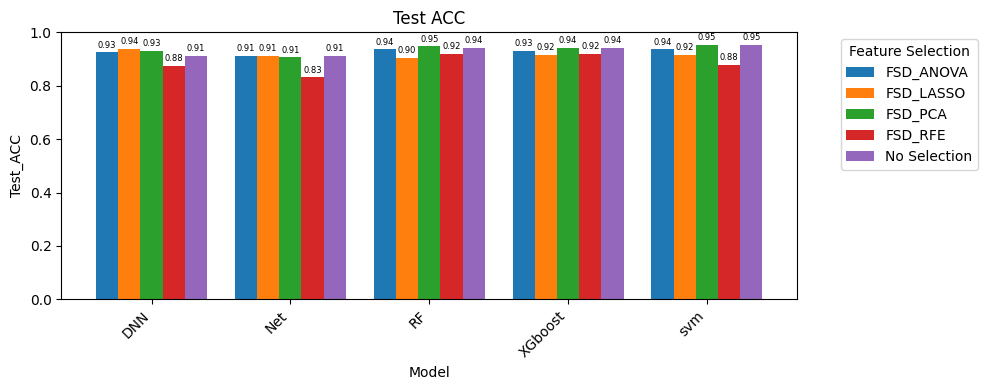

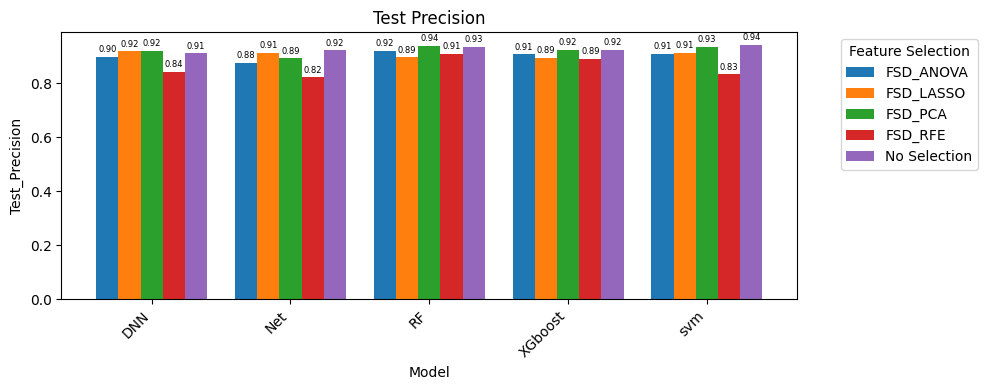

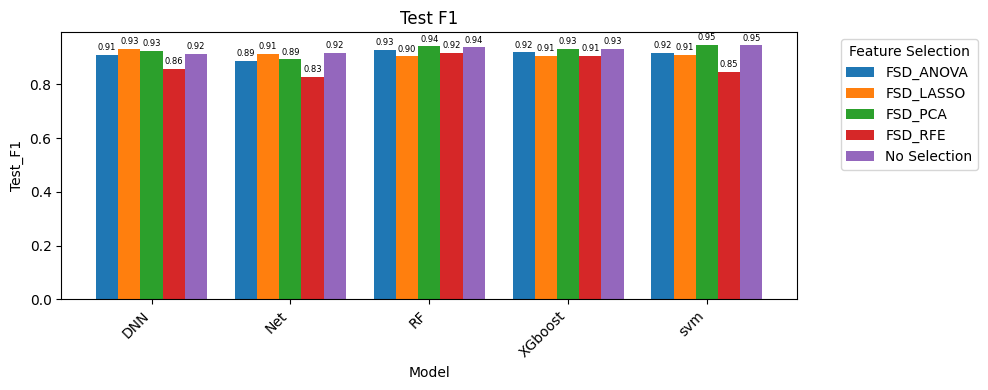

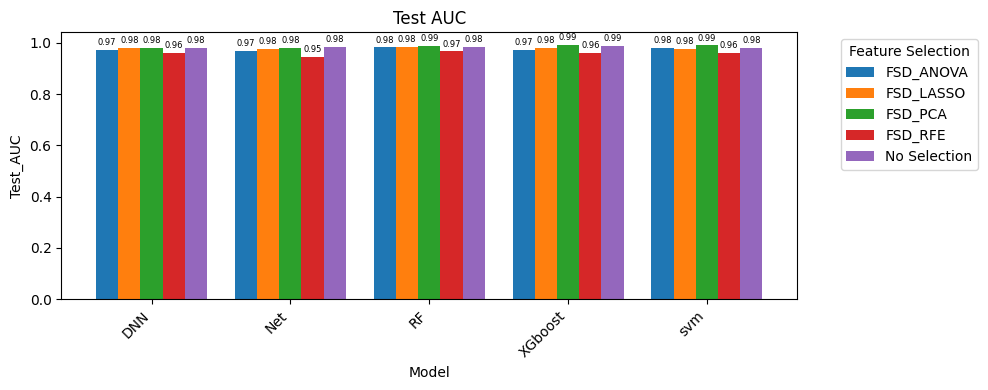

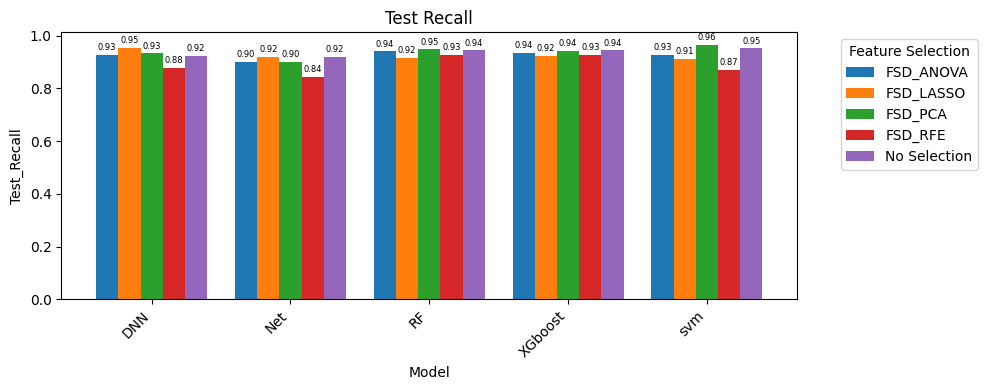

In [43]:
import matplotlib.pyplot as plt

metrics = ['Test_ACC', 'Test_Precision', 'Test_F1', 'Test_AUC', 'Test_Recall']

results_df['Model'] = results_df['Model'].astype(str)
results_df['Feature Selection'] = results_df['Feature Selection'].astype(str)

for metric in metrics:
    metric_table = results_df.pivot_table(
        index='Model',
        columns='Feature Selection',
        values=metric,
        aggfunc='mean'
    )
    ax = metric_table.plot(kind='bar', figsize=(10, 4), width=0.8)
    ax.set_title(metric.replace('_', ' '))
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.legend(title='Feature Selection', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')

    for patch in ax.patches:
        height = patch.get_height()
        if pd.isna(height):
            continue
        ax.annotate(
            f"{height:.2f}",
            (patch.get_x() + patch.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=6,
            xytext=(0, 2),
            textcoords='offset points'
        )

    plt.tight_layout()
    plt.show()
